## Scaler dataframe for Auger Open Data 
### Periodicity analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from augerscalerpy.scaler_cleaning import scaler_clean, plot_data

In [3]:
import astropy
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_body
import astropy.units as u

In [4]:
### PROMEDIO DE VENTANA MÓVIL 
### _________________________

scaler3600s = scaler_clean('scaler_ALL_hourly_11abril.csv','scaler_3600s')

Hay  (11805, 4) líneas vacías


In [5]:
scaler_sidereal = scaler3600s.copy()
scaler_sidereal

,Date,ScalerCorr,pressure,activeSD
1364,2006-01-01 00:29:46,1603.57,858.762,544.333
1365,2006-01-01 00:59:46,1603.88,859.376,549.250
1366,2006-01-01 01:29:46,1604.98,859.990,554.083
1367,2006-01-01 01:59:46,1606.05,860.604,558.083
1368,2006-01-01 02:29:46,1607.02,861.121,561.833
...,...,...,...,...
253138,2020-12-31 20:59:46,1656.40,858.720,424.167
253139,2020-12-31 21:29:46,1654.27,858.809,422.500
253140,2020-12-31 21:59:46,1654.61,858.950,421.833
253141,2020-12-31 22:29:46,1655.48,859.195,423.333


In [6]:
print(scaler_sidereal['Date'].dtype)

datetime64[ns]


In [7]:
scaler_sidereal = scaler_sidereal.dropna()
scaler_sidereal = scaler_sidereal.reset_index(drop=True)
print(scaler_sidereal)

                      Date  ScalerCorr  pressure  activeSD
0      2006-01-01 00:29:46     1603.57   858.762   544.333
1      2006-01-01 00:59:46     1603.88   859.376   549.250
2      2006-01-01 01:29:46     1604.98   859.990   554.083
3      2006-01-01 01:59:46     1606.05   860.604   558.083
4      2006-01-01 02:29:46     1607.02   861.121   561.833
...                    ...         ...       ...       ...
225024 2020-12-31 20:59:46     1656.40   858.720   424.167
225025 2020-12-31 21:29:46     1654.27   858.809   422.500
225026 2020-12-31 21:59:46     1654.61   858.950   421.833
225027 2020-12-31 22:29:46     1655.48   859.195   423.333
225028 2020-12-31 22:59:46     1654.73   859.466   425.083

[225029 rows x 4 columns]


In [8]:
print(scaler_sidereal.columns)

Index(['Date', 'ScalerCorr', 'pressure', 'activeSD'], dtype='object')


In [9]:
print(scaler_sidereal.head())

                 Date  ScalerCorr  pressure  activeSD
0 2006-01-01 00:29:46     1603.57   858.762   544.333
1 2006-01-01 00:59:46     1603.88   859.376   549.250
2 2006-01-01 01:29:46     1604.98   859.990   554.083
3 2006-01-01 01:59:46     1606.05   860.604   558.083
4 2006-01-01 02:29:46     1607.02   861.121   561.833


In [10]:
# Definir la ubicación geográfica
malargue_location = EarthLocation(lat=-35.4889*u.deg, lon=-69.5857*u.deg)


In [11]:
# Convertir la columna "Date" a formato Time
scaler_sidereal['Date'] = Time(scaler_sidereal['Date'])
times = Time(scaler_sidereal['Date'])

In [12]:

# Convertir las unidades de tiempo a UTC
times = times.utc

In [13]:
# Obtener el tiempo sidéreo
sidereal_times = times.sidereal_time('mean', longitude=malargue_location.lon)


In [14]:

# Agregar la columna 'Sidereal_Time' al dataframe
scaler_sidereal['Sidereal_Time'] = sidereal_times


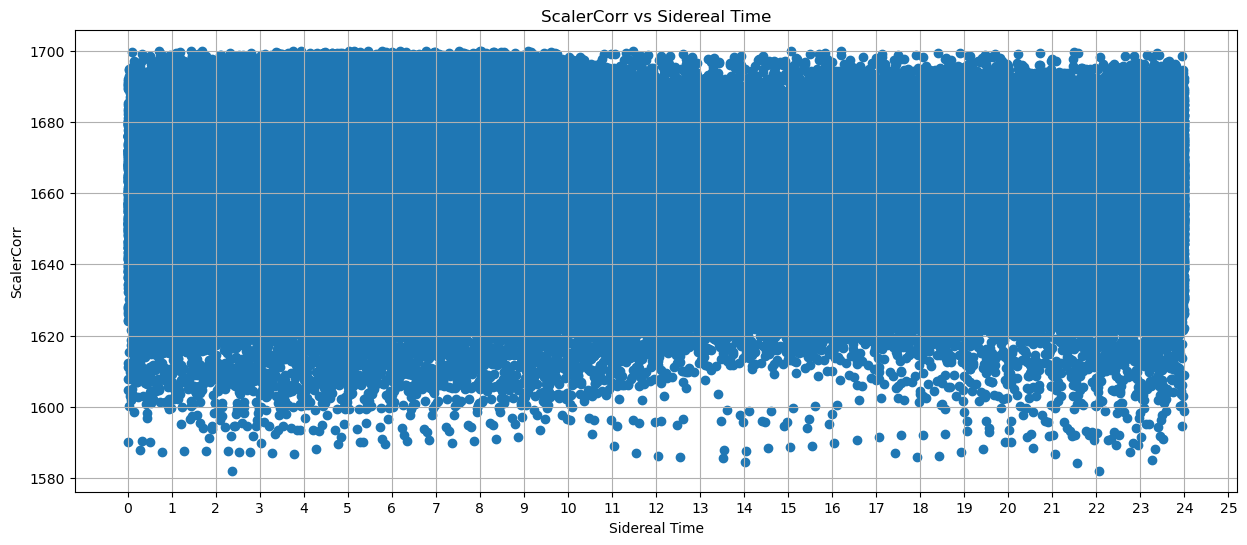

In [18]:

import matplotlib.pyplot as plt

# Graficar la columna "ScalerCorr" en función de "Sidereal Time"
plt.figure(figsize=(15, 6))  # Ancho: 10 pulgadas, Alto: 6 pulgadas
x_ticks = np.arange(0, 26, 1)
plt.xticks(x_ticks)
# Habilitar la cuadrícula
plt.grid(True)
plt.scatter(scaler_sidereal["Sidereal_Time"], scaler_sidereal["ScalerCorr"])
plt.xlabel("Sidereal Time")
plt.ylabel("ScalerCorr")
plt.title("ScalerCorr vs Sidereal Time")
plt.show()


In [20]:
from astropy.time import Time

# Convertir la columna 'Sidereal_Time' a objetos Time
sidereal_times = Time(scaler_sidereal['Sidereal_Time'])

# Convertir las fechas de filtrado a objetos Time
start_date = Time("2017-08-01")
end_date = Time("2017-09-01")

# Filtrar los datos para el mes de agosto de 2017
mes = scaler_sidereal[(sidereal_times >= start_date) & (sidereal_times < end_date)]


ValueError: No time format was given, and the input is not unique

In [21]:
from astropy.time import Time

# Define el formato de fecha en la columna 'Sidereal_Time' (por ejemplo, 'iso' para formato ISO8601)
date_format = 'iso'

# Convertir la columna 'Sidereal_Time' a objetos Time
sidereal_times = Time(scaler_sidereal['Sidereal_Time'], format=date_format)

# Define las fechas de inicio y fin en el mismo formato que el de la columna 'Sidereal_Time'
start_date = Time("2017-08-01", format=date_format)
end_date = Time("2017-09-01", format=date_format)

# Filtrar los datos para el mes de agosto de 2017
mes = scaler_sidereal[(sidereal_times >= start_date) & (sidereal_times < end_date)]


ValueError: Input values did not match the format class iso:
TypeError: Input values for iso class must be strings

In [16]:
import matplotlib.pyplot as plt



# Graficar la columna "ScalerCorr" en función de "Sidereal Time" para el mes de agosto de 2017
plt.figure(figsize=(15, 6))
x_ticks = np.arange(0, 26, 1)
plt.xticks(x_ticks)
plt.grid(True)
plt.scatter(mes["Sidereal_Time"], mes["ScalerCorr"])
plt.xlabel("Sidereal Time")
plt.ylabel("ScalerCorr")
plt.title("ScalerCorr vs Sidereal Time (August 2017)")
plt.show()


KeyboardInterrupt: 

In [62]:
# Convertir la columna "Date" a objetos Time de astropy
scaler_sidereal['Date'] = Time(scaler_sidereal['Date'])

# Definir la fecha de inicio y fin para el filtrado
start_date = Time('2017-08-01')
end_date = Time('2017-08-31')

# Filtrar los datos para el mes de agosto de 2017
august_2017_data = scaler_sidereal[(scaler_sidereal['Date'] >= start_date) & (scaler_sidereal['Date'] <= end_date)]


# Graficar la columna "ScalerCorr" en función de "Sidereal Time" para agosto de 2017
plt.figure(figsize=(15, 6))
x_ticks = np.arange(0, 26, 1)
plt.xticks(x_ticks)
plt.grid(True)
plt.scatter(august_2017_data["Sidereal_Time"], august_2017_data["ScalerCorr"])
plt.xlabel("Sidereal Time")
plt.ylabel("ScalerCorr")
plt.title("ScalerCorr vs Sidereal Time (August 2017)")
plt.show()


UnitConversionError: '' (dimensionless) and 'hourangle' (angle) are not convertible

In [16]:

import matplotlib.pyplot as plt
# Suavizar los datos promediando los valores dentro de intervalos de tiempo más grandes
interval = 1  # Intervalo de tiempo en horas para el suavizado
smoothed_data = scaler_sidereal.groupby(pd.cut(scaler_sidereal["Sidereal_Time"], bins=np.arange(0, 25, interval))).mean()

# Verificar el tamaño de la muestra no excede el tamaño del DataFrame
sample_size = min(100, len(smoothed_data))

# Graficar una muestra de los datos suavizados como puntos
sampled_data = smoothed_data.sample(n=sample_size, replace=False)

# Ajustar el tamaño de la gráfica
plt.figure(figsize=(15, 6))  # Ancho: 10 pulgadas, Alto: 6 pulgadas
x_ticks = np.arange(0, 26, 1)
plt.xticks(x_ticks)
# Habilitar la cuadrícula
plt.grid(True)
# Graficar los puntos suavizados
plt.plot(sampled_data["Sidereal_Time"], sampled_data["ScalerCorr"], marker='o', linestyle='')

plt.xlabel("Sidereal Time")
plt.ylabel("ScalerCorr")
plt.title("ScalerCorr vs Sidereal Time")
# Ajustar los límites del eje x para mostrar cada hora hasta 25
plt.xlim(0, 25)

plt.show()



/tmp/ipykernel_22516/1805253264.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoothed_data = scaler_sidereal.groupby(pd.cut(scaler_sidereal["Sidereal_Time"], bins=np.arange(0, 25, interval))).mean()


TypeError: OperandTypeError.__init__() missing 1 required positional argument: 'right'

In [17]:
import matplotlib.pyplot as plt

# Suavizar los datos promediando los valores dentro de intervalos de tiempo más grandes
interval = 1  # Intervalo de tiempo en horas para el suavizado
smoothed_data = scaler_sidereal.groupby(pd.cut(scaler_sidereal["Sidereal_Time"], bins=np.arange(0, 25, interval))).mean()

# Verificar el tamaño de la muestra no excede el tamaño del DataFrame
sample_size = min(100, len(smoothed_data))

# Graficar una muestra de los datos suavizados como puntos
sampled_data = smoothed_data.sample(n=sample_size, replace=False)

# Obtener el promedio y desviación estándar para cada punto
means = sampled_data["ScalerCorr"]
stds = scaler_sidereal.groupby(pd.cut(scaler_sidereal["Sidereal_Time"], bins=np.arange(0, 25, interval))).std()["ScalerCorr"]

# Ajustar el tamaño de la gráfica
plt.figure(figsize=(15, 6))
x_ticks = np.arange(0, 26, 1)
plt.xticks(x_ticks)
# Habilitar la cuadrícula
plt.grid(True)

# Graficar los puntos suavizados con barras de error
plt.errorbar(sampled_data["Sidereal_Time"], means, yerr=stds, fmt='o', markersize=4, capsize=3,ecolor="LightCoral")

plt.xlabel("Sidereal Time")
plt.ylabel("ScalerCorr")
plt.title('All Scaler Data')

# Ajustar los límites del eje x para mostrar cada hora hasta 25
plt.xlim(0, 25)
plt.savefig("scaler_sidereal.png")
plt.show()

/tmp/ipykernel_22516/4263280227.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoothed_data = scaler_sidereal.groupby(pd.cut(scaler_sidereal["Sidereal_Time"], bins=np.arange(0, 25, interval))).mean()


TypeError: OperandTypeError.__init__() missing 1 required positional argument: 'right'

# Observando la periodicidad diaria en tiempo solar

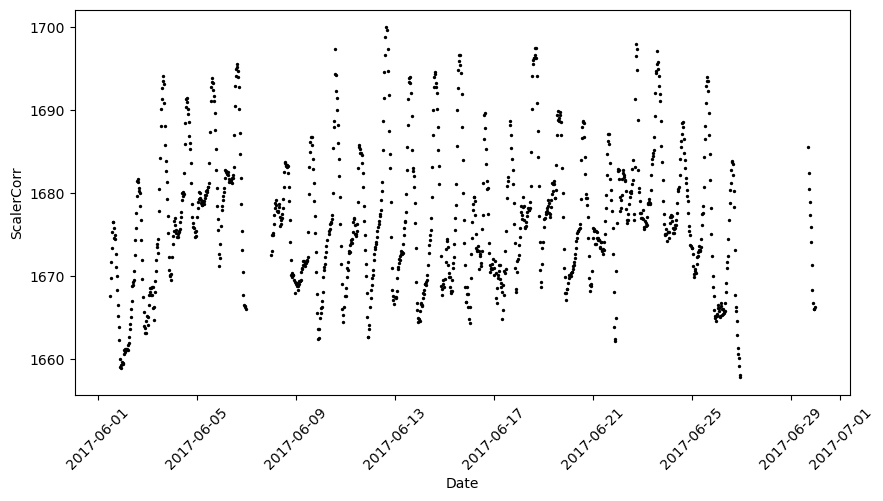

In [22]:
#OBSERVANDO PERIODICIDAD DIARIA POR SIMPLE INSPECCIÓN

mes = scaler3600s[scaler3600s['Date'] >= "2017-06-01"]
#mes = scaler3600s[scaler3600s['Date'] >= pd.to_datetime("2015-06-01", utc=True)]

#mesjun = mes[mes['Date'] <= pd.to_datetime("2015-06-30", utc=True) ]
mesjun = mes[mes['Date'] <= "2017-06-30" ]

mesjun.plot(kind='scatter', s= 2, x='Date',y='ScalerCorr',rot=45,figsize=(10, 5),color='black')
plt.savefig('junio_2017.jpg')

plt.show()

In [52]:
mesjun['Day'] = mesjun['Date'].dt.day

<ipython-input-52-62998892503d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mesjun['Day'] = mesjun['Date'].dt.day


In [53]:
mesjun['Day']

192302     1
192303     1
192304     1
192305     1
192306     1
          ..
193449    29
193450    29
193451    29
193452    29
193453    29
Name: Day, Length: 1157, dtype: int64

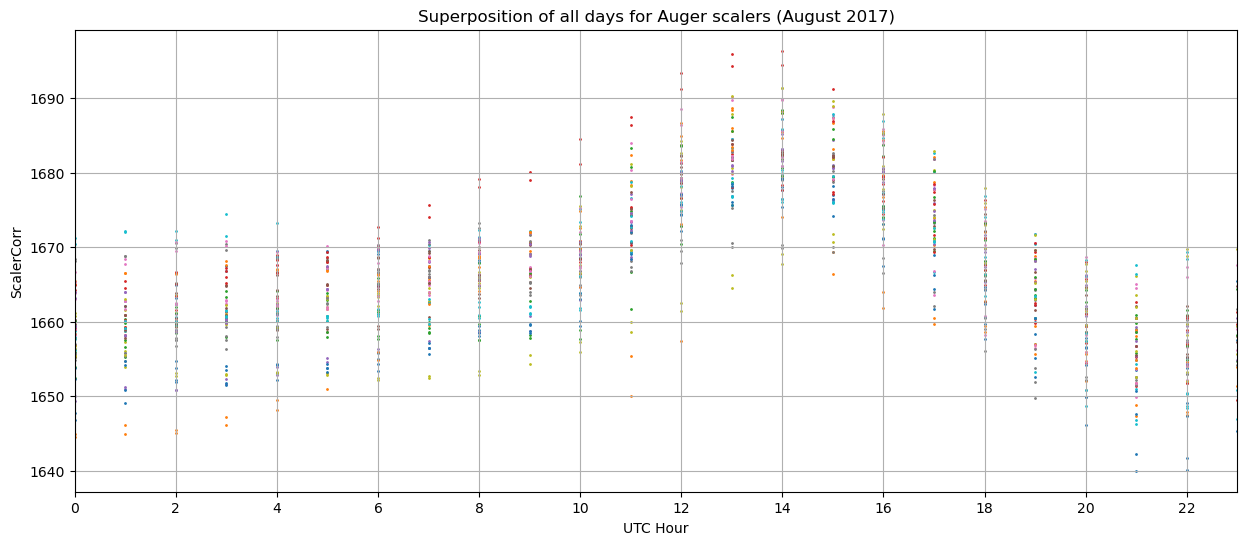

In [23]:
import matplotlib.pyplot as plt

# Seleccionamos los datos correspondientes al mes de agosto del 2017
mes = scaler3600s[(scaler3600s['Date'] >= "2017-08-01") & (scaler3600s['Date'] < "2017-09-01")]

#mes = scaler3600s[(scaler3600s['Date'] >= "2006-06-01") & (scaler3600s['Date'] < "2020-07-01")]

# Creamos una figura y un objeto de tipo Axes
fig, ax = plt.subplots(figsize=(15, 6))

# Graficamos los datos para cada día del mes
for day in sorted(set(mes['Date'].dt.day)):
    # Seleccionamos los datos correspondientes a ese día
    data = mes[mes['Date'].dt.day == day]
    # Graficamos los valores de la columna "ScalerCorr"
    #ax.plot(data['Date'].dt.hour, data['ScalerCorr'], label=f"Day {day}")
    ax.scatter(data['Date'].dt.hour, data['ScalerCorr'], label=f"Day {day}", s=1)

# Configuramos el eje horizontal para que muestre las horas en UTC del día de 0h a 24h
# Ajustar el tamaño de la gráfica
#ax.figsize=(15, 6)
ax.set_xlim(0, 23)
ax.set_xticks(range(0, 24, 2))
ax.set_xlabel("UTC Hour")

# Configuramos el eje vertical
ax.set_ylabel("ScalerCorr")

# Añadimos una leyenda
#ax.legend()
ax.set_title('Superposition of all days for Auger scalers (August 2017)')


# Mostramos la gráfica
plt.savefig('Scalers_August_2017_SUP.jpg')
ax.grid(True)
plt.show()


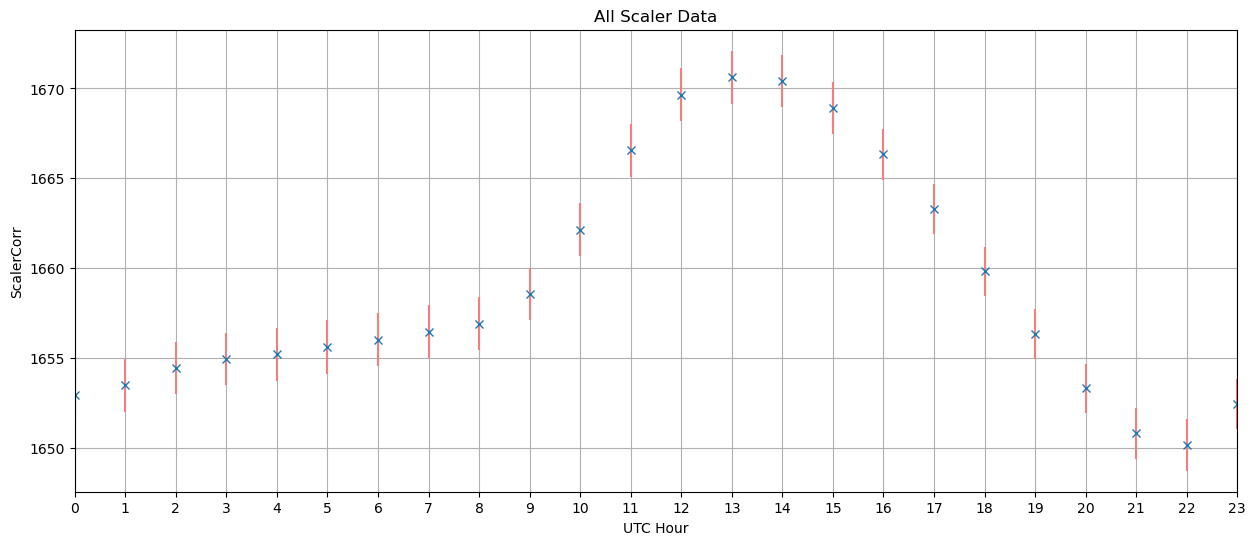

In [24]:
import matplotlib.pyplot as plt

# Seleccionamos los datos correspondientes al mes de junio de 2016
#mes = scaler3600s[(scaler3600s['Date'] >= "2017-06-01") & (scaler3600s['Date'] < "2017-07-01")]
mes = scaler3600s[(scaler3600s['Date'] >= "2006-06-01") & (scaler3600s['Date'] < "2020-07-01")]

# Creamos una figura y un objeto de tipo Axes
fig, ax = plt.subplots(figsize=(15, 6))
ax.grid(True)
# Obtener el promedio y la desviación estándar para cada hora del día
promedios = mes.groupby(mes['Date'].dt.hour)['ScalerCorr'].mean()
desviaciones = mes.groupby(mes['Date'].dt.hour)['ScalerCorr'].std()

# Graficamos los datos para cada día del mes
#for day in sorted(set(mes['Date'].dt.day)):
    # Seleccionamos los datos correspondientes a ese día
#    data = mes[mes['Date'].dt.day == day]
    # Graficamos los valores de la columna "ScalerCorr"
    #ax.plot(data['Date'].dt.hour, data['ScalerCorr'], label=f"Day {day}")
#    ax.scatter(data['Date'].dt.hour, data['ScalerCorr'], label=f"Day {day}", s=1)

# Agregar la gráfica del promedio diario con su barra de error
ax.errorbar(promedios.index, promedios, yerr=desviaciones/10, fmt='x', label="Average",ecolor="LightCoral")

# Configuramos el eje horizontal para que muestre las horas en UTC del día de 0h a 24h
ax.set_xlim(0, 23)
ax.set_xticks(range(0, 24, 1))
ax.set_xlabel("UTC Hour")

# Configuramos el eje vertical
ax.set_ylabel("ScalerCorr")

# Añadimos una leyenda
#ax.legend()
ax.set_title('All Scaler Data')

# Mostramos la gráfica
plt.savefig('Scalers_All_SUP.png')

plt.show()


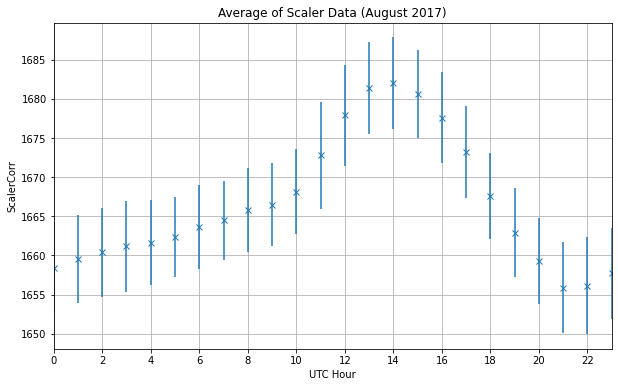

In [40]:
import matplotlib.pyplot as plt

# Seleccionamos los datos correspondientes al mes de junio de 2016
mes = scaler3600s[(scaler3600s['Date'] >= "2017-08-01") & (scaler3600s['Date'] < "2017-09-01")]
#mes = scaler3600s[(scaler3600s['Date'] >= "2006-06-01") & (scaler3600s['Date'] < "2020-07-01")]

# Creamos una figura y un objeto de tipo Axes
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener el promedio y la desviación estándar para cada hora del día
promedios = mes.groupby(mes['Date'].dt.hour)['ScalerCorr'].mean()
desviaciones = mes.groupby(mes['Date'].dt.hour)['ScalerCorr'].std()

# Graficamos los datos para cada día del mes
#for day in sorted(set(mes['Date'].dt.day)):
    # Seleccionamos los datos correspondientes a ese día
#    data = mes[mes['Date'].dt.day == day]
    # Graficamos los valores de la columna "ScalerCorr"
    #ax.plot(data['Date'].dt.hour, data['ScalerCorr'], label=f"Day {day}")
#    ax.scatter(data['Date'].dt.hour, data['ScalerCorr'], label=f"Day {day}", s=1)

# Agregar la gráfica del promedio diario con su barra de error
ax.errorbar(promedios.index, promedios, yerr=desviaciones, fmt='x', label="Average")

# Configuramos el eje horizontal para que muestre las horas en UTC del día de 0h a 24h
ax.set_xlim(0, 23)
ax.set_xticks(range(0, 24, 2))
ax.set_xlabel("UTC Hour")

# Configuramos el eje vertical
ax.set_ylabel("ScalerCorr")

# Añadimos una leyenda
#ax.legend()
ax.set_title('Average of Scaler Data (August 2017)')

# Mostramos la gráfica
plt.savefig('Scalers_All_SUP.png')
ax.grid(True)
plt.show()

In [ ]:
################# USANDO LOS DATOS EN GPS
## OJO LOS VALORES TEMPORALES NO HAN SIDO CONVERTIDOS

In [5]:
df = pd.read_csv('scaler_ALL_hourly_11abril.csv')
scalerC = df.sort_values(by=['Date'])
nocero = scalerC[scalerC['ScalerCorr'] != 0 ]
taste = nocero
    #Cuántos valores cero hay? --No relevante
EMPTY =scalerC[scalerC['ScalerCorr'] == 0 ]
print("Hay ", EMPTY.shape, "líneas vacías")

    #AJUSTE EXCESOS
    #SDBAD1 =taste[taste['ScalerCorr'] > 1900 ]
    #SDBAD2 =taste[taste['ScalerCorr'] < 1500 ]
SDOK = taste[taste['ScalerCorr'] > 1580  ]
SDOK = SDOK[SDOK['ScalerCorr'] < 1700 ]

Hay  (11805, 4) líneas vacías


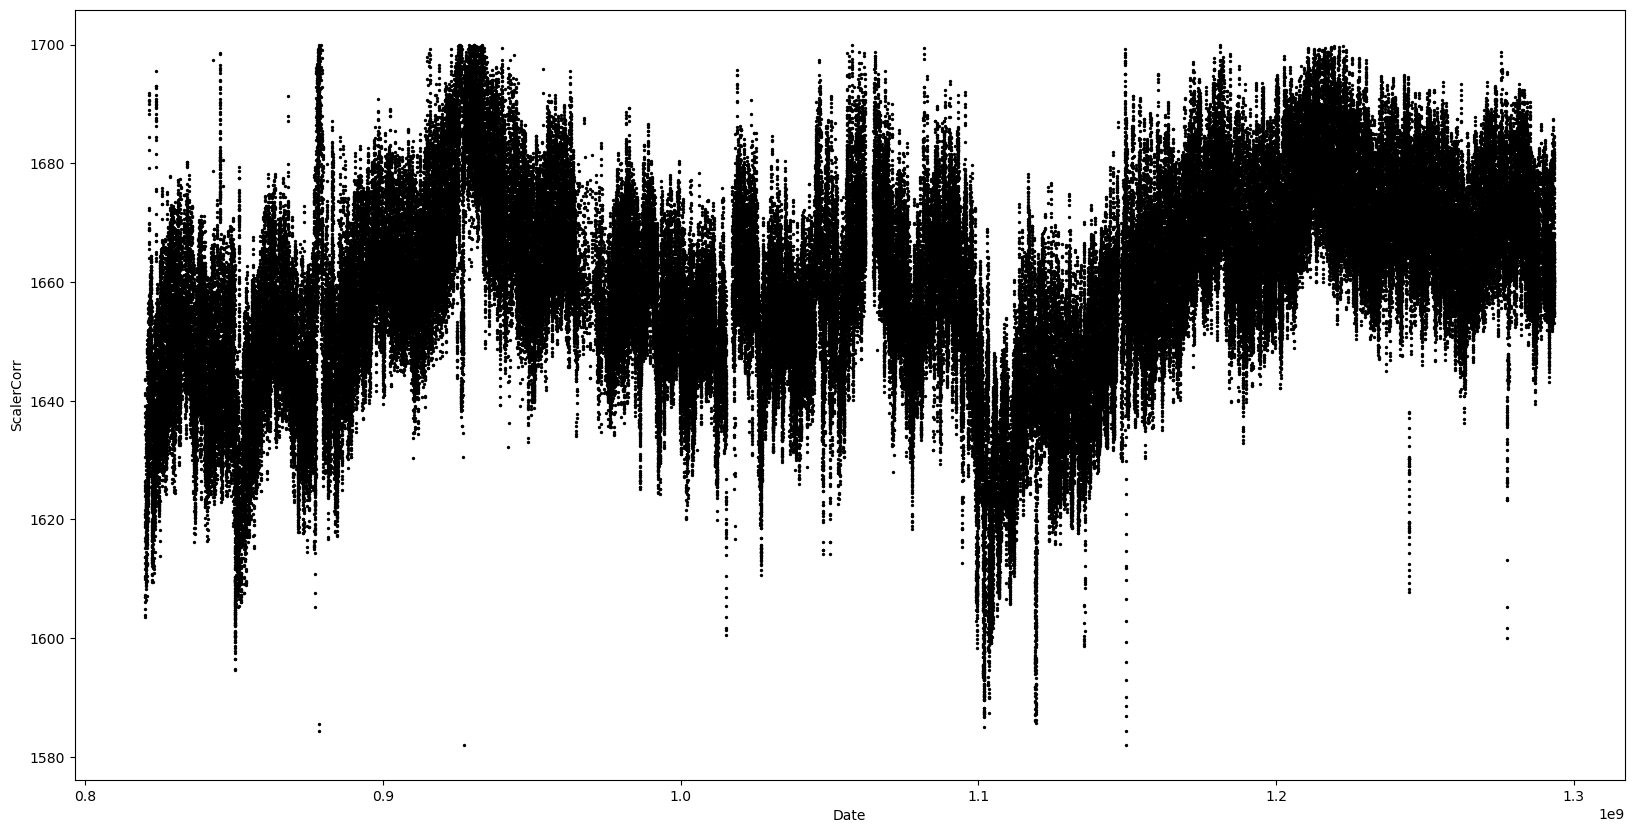

In [8]:
SDOK.plot(kind='scatter', s= 2,x='Date',y='ScalerCorr',color='black', figsize =(20,10))
plt.show()

In [9]:

# Convertir la columna "Date" a formato Time en UTC
times_utc = Time(SDOK["Date"], format='gps', scale='utc')

In [13]:
times_utc

<Time object: scale='utc' format='gps' value=[8.2011060e+08 8.2011240e+08 8.2011420e+08 ... 1.2934872e+09 1.2934890e+09
 1.2934908e+09]>

In [10]:
# Definir la ubicación geográfica de Malargue, Argentina
malargue_location = EarthLocation(lat=-35.4889, lon=-69.5857)

In [16]:
# Convertir las unidades de tiempo a tiempo sidéreo
times_sidereal = times_utc.sidereal_time('mean', longitude=malargue_location.lon)


In [19]:
len(times_sidereal)

225030

In [25]:
# Actualizar la columna "Date" del DataFrame con el tiempo sidéreo convertido
#SDOK["Date"] = times_sidereal
SDOK['Date'] = times_sidereal
# Imprimir el DataFrame con los datos convertidos a tiempo sidéreo
#print(SDOK)

In [26]:
SDOK

UnitConversionError: Can only apply 'greater' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan).

UnitConversionError: Can only apply 'greater' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan).